In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from graphstats import *

In [3]:
def decision_boundary(pi1, mu1, mu2, s1, s2):
    var1 = s1**2
    var2 = s2**2
    
    neg_b = mu2*var1 - mu1*var2
    disc1 = (mu2*var1 - mu1*var2)**2
    disc2 = (var1 - var2)*(mu2**2 * var1 - mu1**2 * var2 + 2*var1*var2*np.log(pi1*s2/((1 - pi1)*s1)))
    disc = disc1 - disc2
    sqrt_disc = np.sqrt(disc)
    
    a = var1 - var2
    
    x_plus = (neg_b + sqrt_disc)/a
    x_minus = (neg_b - sqrt_disc)/a
    
    return x_minus, x_plus

In [4]:
C_ptr = (1/17)*np.array([[0 , 6.5 , 6.5 , 0 , 6.5 , 6.5 , 0 , 0 , 0 , 1.5],
[6.5 , 0 , 6.5 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
[6.5 , 6.5 , 0 , 6.5 , 0 , 0 , 12 , 15 , 0 , 15],
[0 , 0 , 6.5 , 0 , 1.5 , 12 , 6.5 , 0 , 0 , 0],
[6.5 , 0 , 0 , 1.5 , 0 , 0 , 12 , 0 , 0 , 0],
[6.5 , 0 , 0 , 12 , 0 , 0 , 0 , 0 , 0 , 0],
[0 , 0 , 12 , 6.5 , 12 , 0 , 0 , 0 , 15 , 0],
[0 , 0 , 15 , 0 , 0 , 0 , 0 , 0 , 17 , 6.5],
[0 , 0 , 0 , 0 , 0 , 0 , 15 , 17 , 0 , 0],
[1.5 , 0 , 15 , 0 , 0 , 0 , 0 , 6.5 , 0 , 0]])

n = C_ptr.shape[0]
xs = np.arange(-0.4, 1.25, step = 0.02)

In [5]:
X_hat_ptr = adj_spectral_embedding(C_ptr, max_dim = 1)[0]
if X_hat_ptr[0] < 0:
    X_hat_ptr = -1
    
X_hat_ptr = X_hat_ptr[:, 0]
X_hat_ptr

array([0.25771161, 0.18215298, 0.77373034, 0.30242576, 0.2577656 ,
       0.14411223, 0.61321897, 0.64633639, 0.54843917, 0.43997142])

In [9]:
(X_hat_ptr[0] + X_hat_ptr[2])/2

0.515720978717774

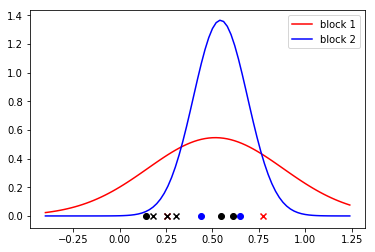

In [6]:
class1_idx = np.array([0,2])
class2_idx = np.array([7,9])

mu1 = np.mean(X_hat_ptr[class1_idx])
mu2 = np.mean(X_hat_ptr[class2_idx])

s1 = np.std(X_hat_ptr[class1_idx], ddof = 1)
s2 = np.std(X_hat_ptr[class2_idx], ddof = 1)

c = []
shapes = []

for i in range(10):
    if i < 5:
        shapes.append('x')
        if i in class1_idx:
            c.append('r')
        else:
            c.append('k')
    else:
        shapes.append('o')
        if i in class2_idx:
            c.append('b')
        else:
            c.append('k')

fig, ax = plt.subplots(1,1)
for i in range(n):
    ax.scatter(X_hat_ptr[i], 0, c = c[i], marker = shapes[i])
ax.plot(xs, 0.5*norm.pdf(xs, mu1, s1), c = 'r', label = 'block 1')
ax.plot(xs, 0.5*norm.pdf(xs, mu2, s2), c = 'b', label = 'block 2')

ax.legend(loc = 'upper right')
plt.savefig('small_example1.png')

In [7]:
mu1, mu2, s1, s2

(0.515720978717774,
 0.5431539045688135,
 0.36488034191900415,
 0.14592207455463602)

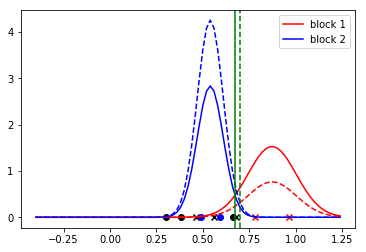

In [73]:
A = strip_weights(C_ptr)

X_hat = adj_spectral_embedding(A, max_dim = 1)[0]
if X_hat[0] < 0:
    X_hat *= -1
    
X_hat = X_hat[:, 0]

class1_idx = np.array([0,2])
class2_idx = np.array([7,9])

c = []
shapes = []

for i in range(10):
    if i < 5:
        shapes.append('x')
        if i in class1_idx:
            c.append('r')
        else:
            c.append('k')
    else:
        shapes.append('o')
        if i in class2_idx:
            c.append('b')
        else:
            c.append('k')

mu1 = np.mean(X_hat[class1_idx])
mu2 = np.mean(X_hat[class2_idx])

s1 = np.std(X_hat[class1_idx], ddof = 1)
s2 = np.std(X_hat[class2_idx], ddof = 1)

x_minus1, x_plus1 = decision_boundary(0.5, mu1, mu2, s1, s2)
x_minus2, x_plus2 = decision_boundary(0.25, mu1, mu2, s1, s2)

fig, ax = plt.subplots(1,1)

for i in range(n):
    ax.scatter(X_hat[i], 0, c = c[i], marker = shapes[i])
ax.plot(xs, 0.5*norm.pdf(xs, mu1, s1), c = 'r', label = 'block 1')
ax.plot(xs, 0.5*norm.pdf(xs, mu2, s2), c = 'b', label = 'block 2')

ax.plot(xs, 0.25*norm.pdf(xs, mu1, s1), c = 'r', ls = '--')
ax.plot(xs, 0.75*norm.pdf(xs, mu2, s2), c = 'b', ls = '--')

ax.axvline(x = x_plus1, c = 'g')
ax.axvline(x = x_plus2, c = 'g', ls = '--')

ax.legend(loc = 'upper right')
plt.savefig('small_example2.png')

In [47]:
X_hat

array([0.78064279, 0.46055169, 0.96545748, 0.67793023, 0.55906366,
       0.38471346, 0.66101795, 0.49033581, 0.30368126, 0.58988275])